In [1]:
from utils import *

In [2]:
test_cases = [0,1,2,3,4,5,'train_83p']
y_pred = np.empty((0,6,21))
y_gt = np.empty((0,6,21))

for tc in test_cases:
    print(f"start {tc}")
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    print(f"{tc}: loaded archive")
    y_pred = np.concatenate((y_pred, archive["y_pred"]), axis=0)
    print(f"{tc}: loaded pred")
    y_gt = np.concatenate((y_gt, archive["y_gt"]), axis=0)
    print(f"{tc}: loaded gt")

start 0
0: loaded archive
0: loaded pred
0: loaded gt
start 1
1: loaded archive
1: loaded pred
1: loaded gt
start 2
2: loaded archive
2: loaded pred
2: loaded gt
start 3
3: loaded archive
3: loaded pred
3: loaded gt
start 4
4: loaded archive
4: loaded pred
4: loaded gt
start 5
5: loaded archive
5: loaded pred
5: loaded gt
start train_83p
train_83p: loaded archive
train_83p: loaded pred
train_83p: loaded gt


In [3]:
pred = []
gt = []

for i in range(len(y_gt)):
    pred_pitches = tab_to_pitch(y_pred[i])
    gt_pitches = tab_to_pitch(y_gt[i])
    pred_pitches.sort()
    gt_pitches.sort()

    pred_pitches, gt_pitches = process_pitches(pred_pitches, gt_pitches)
    if (len(pred_pitches) != len(gt_pitches)):
        raise "Hello?"

    pred += pred_pitches
    gt += gt_pitches

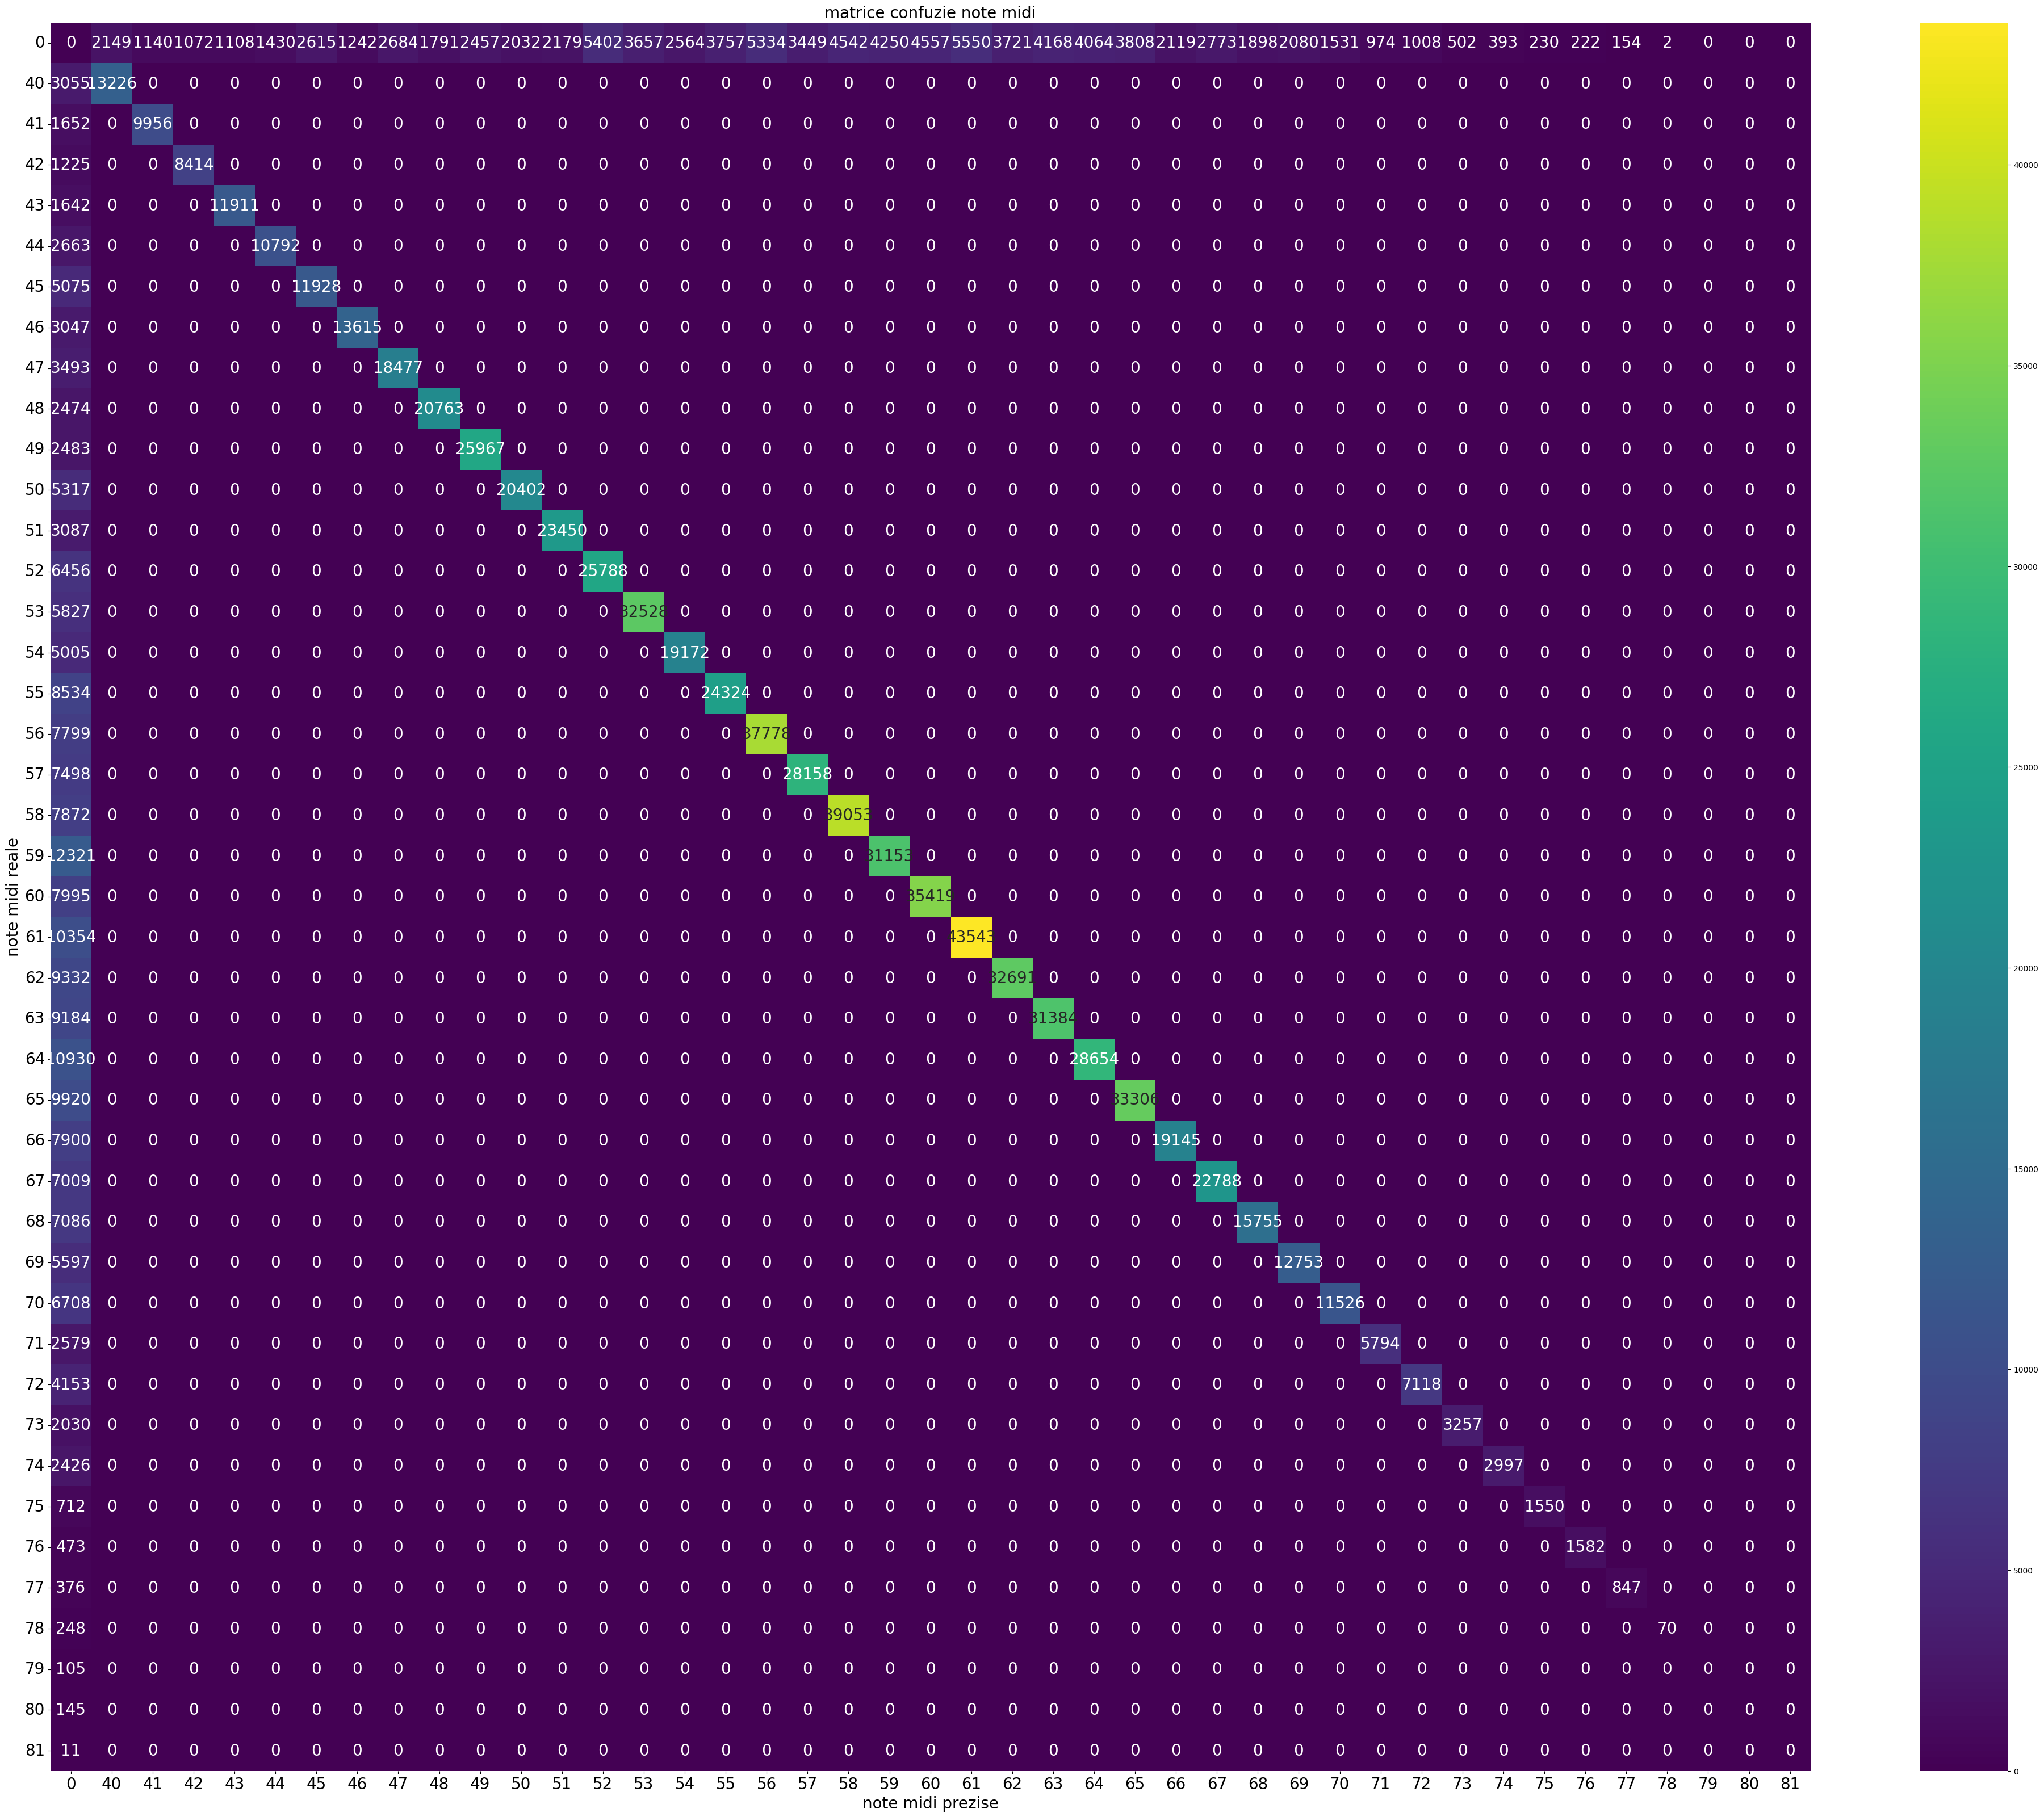

In [4]:

pred = np.array(pred)
gt = np.array(gt)
labels = ['0'] + [str(i) for i in range(40, 82)]
plot_confusion_matrix(pred, gt, 'matrice confuzie note midi', labels=labels, size=(50,40), xlabel='note midi prezise', ylabel='note midi reale')
